In [164]:
import pandas as pd

df = pd.read_csv('Spotify_Final_data.csv')
print(df.shape)
df.head()

(170653, 19)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [165]:
from sklearn.preprocessing import MinMaxScaler

df = df[['energy', 'loudness', 'acousticness', 'valence', 'tempo', 'danceability', 'instrumentalness']]
#df = df[['energy', 'acousticness', 'valence', 'tempo', 'danceability', 'instrumentalness']]
#df = df.drop(columns=['id', 'artists', 'name', 'popularity', 'year', 'duration_ms', 'release_date', 'explicit'])
#df = df.sample(n=40000, random_state=10)
df_MinMax = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(df_MinMax, columns = df.columns)
df.head()

,energy,loudness,acousticness,valence,tempo,danceability,instrumentalness
0,0.211,0.624916,0.985944,0.0594,0.332450,0.282389,0.878000
1,0.341,0.744797,0.734940,0.9630,0.250243,0.828947,0.000000
2,0.166,0.707071,0.964859,0.0394,0.453125,0.331984,0.913000
3,0.309,0.793736,0.970884,0.1650,0.411113,0.278340,0.000028
4,0.193,0.781521,0.960843,0.2530,0.417503,0.423077,0.000002


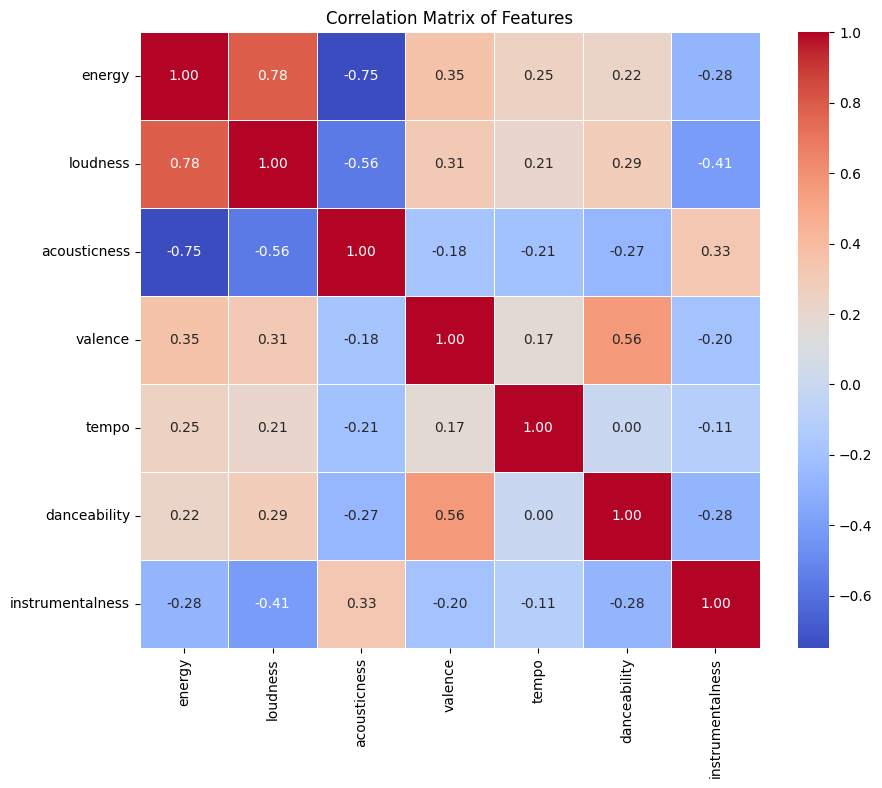

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [167]:
from sklearn.cluster import KMeans

KM = KMeans(init = 'k-means++', n_clusters = 4, random_state = 10)
KM.fit(df)

labels = KM.labels_

In [168]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) 
pca_components = pca.fit_transform(df)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(4)])
df_pca['cluster'] = labels  
print(df_pca.head())
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_)}")

        PC1       PC2       PC3       PC4  cluster
0  0.924528  0.518813 -0.032428  0.030803        3
1  0.044744 -0.495954  0.325303 -0.170591        1
2  0.921325  0.541337 -0.018068  0.003219        3
3  0.487505 -0.152351 -0.408392  0.217629        1
4  0.493702 -0.241115 -0.317992  0.061495        1
Explained Variance Ratio: [0.51843067 0.19029402 0.15903388 0.06082005]
Total Variance Explained: 0.9285786309265266


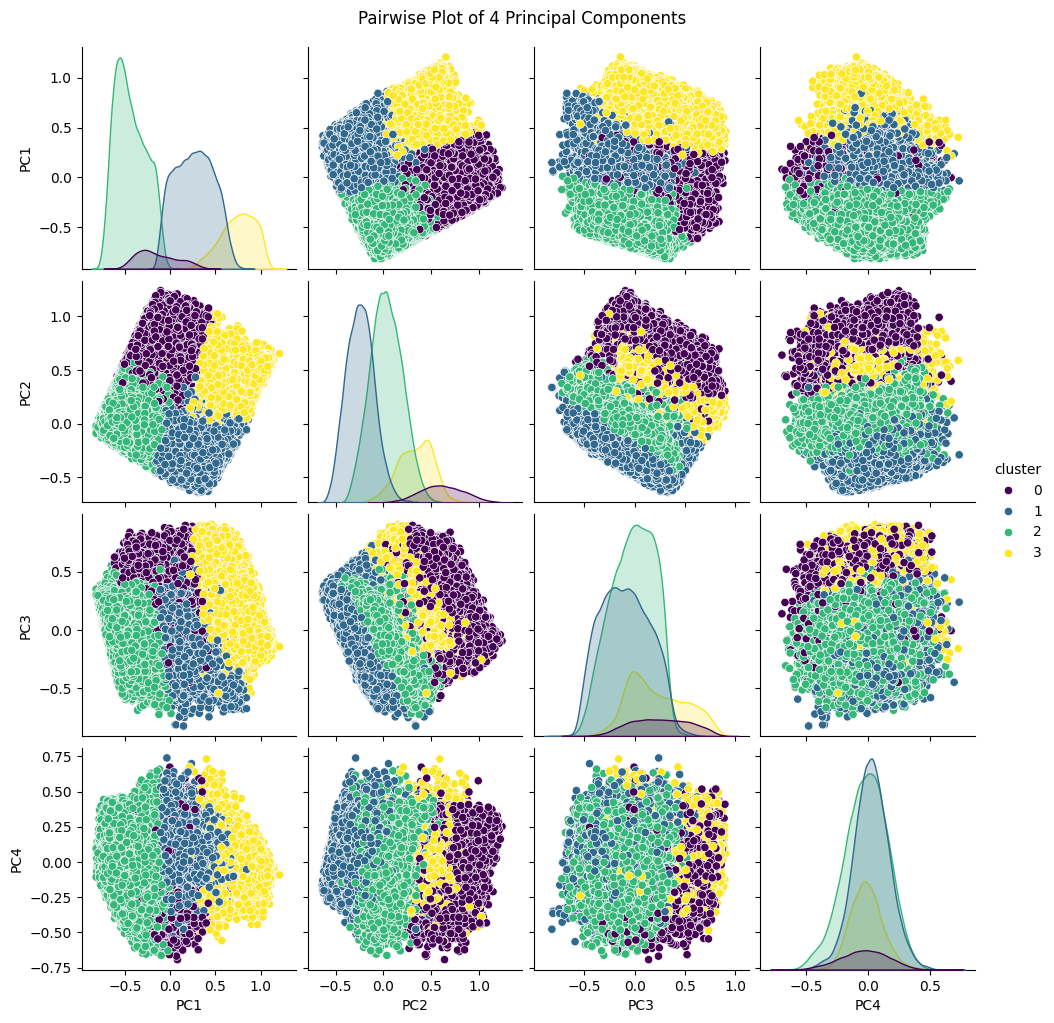

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_pca, hue='cluster', palette='viridis')
plt.suptitle('Pairwise Plot of 4 Principal Components', y=1.02)
plt.show()


        PC1       PC2  cluster
0  0.924528  0.518813        3
1  0.044744 -0.495954        1
2  0.921325  0.541337        3
3  0.487505 -0.152351        1
4  0.493702 -0.241115        1


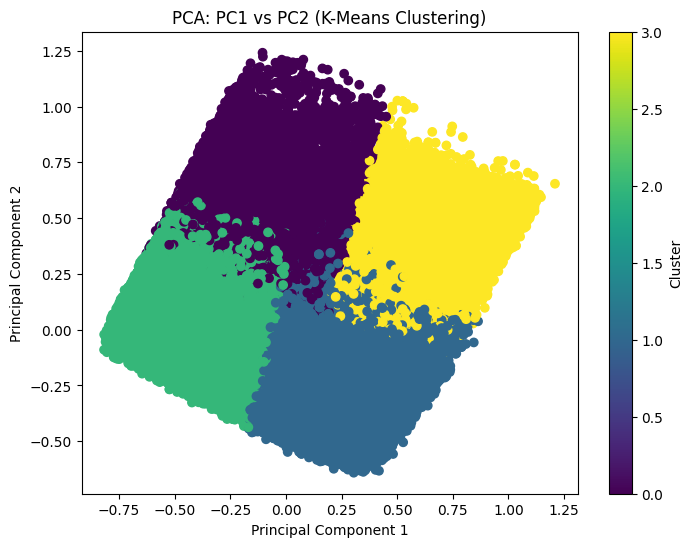

In [170]:
pca = PCA(n_components=2) 
pca_components = pca.fit_transform(df)

df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = labels  

print(df_pca.head())
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.title('PCA: PC1 vs PC2 (K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [171]:
features_with_labels = pd.DataFrame(df, columns=['energy', 'loudness', 'acousticness', 'valence', 'tempo', 'danceability', 'instrumentalness'])
features_with_labels['cluster'] = labels

cluster_means = features_with_labels.groupby('cluster').mean()
print(cluster_means)


           energy  loudness  acousticness   valence     tempo  danceability  \
cluster                                                                       
0        0.687791  0.781995      0.157326  0.505711  0.504744      0.510748   
1        0.312239  0.732148      0.800708  0.492719  0.463215      0.522523   
2        0.683822  0.812916      0.161216  0.605689  0.504709      0.604841   
3        0.219614  0.658260      0.932420  0.386631  0.436614      0.418855   

         instrumentalness  
cluster                    
0                0.708775  
1                0.030681  
2                0.015430  
3                0.814725  


In [172]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3522253981782625


In [173]:
cluster_moods = {
    0: 'Energetic',  # High energy, low valence
    1: 'Calm',       # Low energy, high valence
    2: 'Happy',      # High energy, high valence
    3: 'Sad'         # Low energy, low valence
}

features_with_labels['mood'] = features_with_labels['cluster'].map(cluster_moods)